In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
index_df=pd.read_csv("economic_index.csv")
index_df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [11]:
index_df.drop(labels=["year","month"],axis=1,inplace=True)

In [12]:
index_df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [15]:
## check null values
index_df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

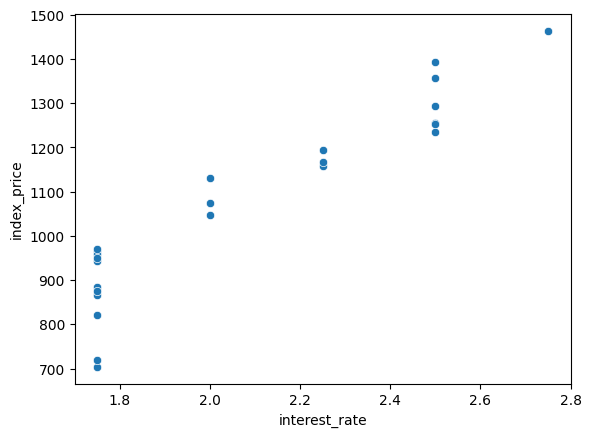

In [16]:
# visualization of the relationship
sns.scatterplot(data=index_df,x="interest_rate",y="index_price")
plt.show()

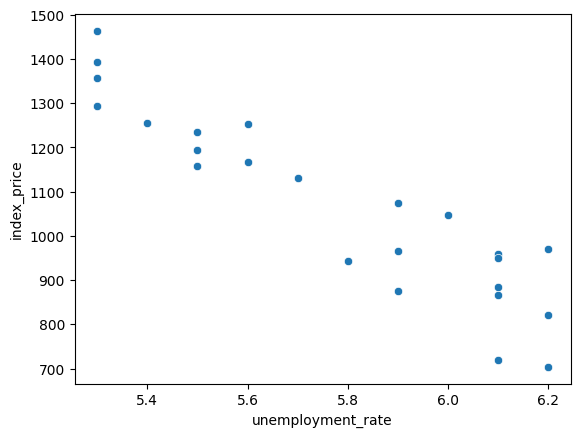

In [17]:
sns.scatterplot(data=index_df,x="unemployment_rate",y="index_price")
plt.show()

In [20]:
# correlation
corr_values=index_df[["interest_rate","unemployment_rate","index_price"]].corr()
corr_values

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


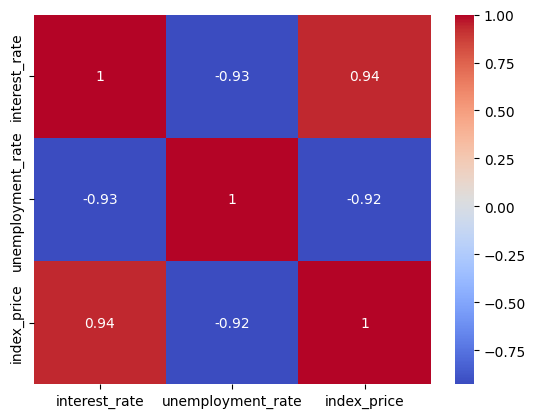

In [21]:
sns.heatmap(corr_values,cmap="coolwarm",annot=True)
plt.show()

# Dependent and Independent features

In [22]:
X=index_df[["interest_rate","unemployment_rate"]]
Y=index_df["index_price"]

In [23]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [24]:
Y.head()

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

# Train-Test Split

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [27]:
X_train

,interest_rate,unemployment_rate
13,1.75,5.9
1,2.50,5.3
21,1.75,6.2
5,2.50,5.6
2,2.50,5.3
12,2.00,6.0
15,1.75,6.1
3,2.50,5.3
4,2.50,5.4
22,1.75,6.2


In [28]:
y_train

13     965
1     1394
21     822
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
22     704
17     949
20     876
23     719
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64

In [30]:
X_test

,interest_rate,unemployment_rate
8,2.25,5.5
16,1.75,6.2
0,2.75,5.3
18,1.75,6.1
11,2.00,5.9
9,2.25,5.6


In [31]:
y_test

8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64

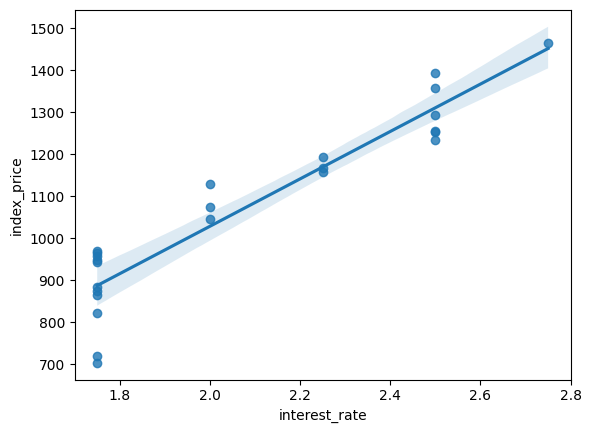

In [33]:
sns.regplot(x=index_df["interest_rate"],y=index_df["index_price"])
plt.show()

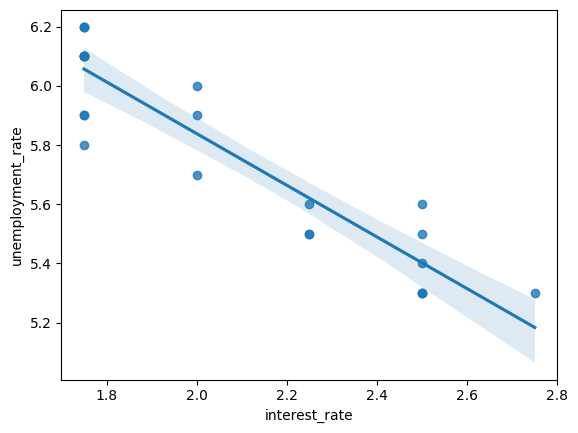

In [34]:
sns.regplot(x=index_df["interest_rate"],y=index_df["unemployment_rate"])
plt.show()

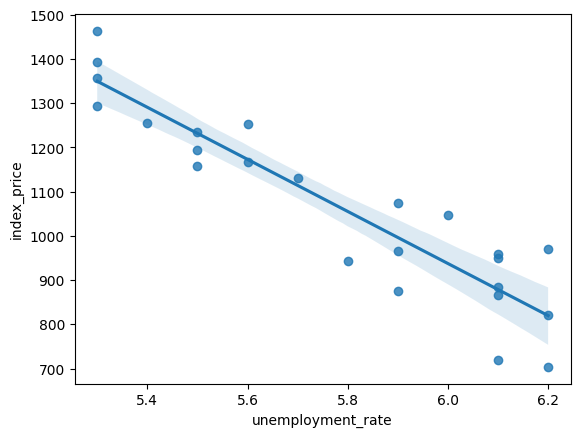

In [35]:
sns.regplot(x=index_df["unemployment_rate"],y=index_df["index_price"])
plt.show()

# Standardization of Input features

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scale=StandardScaler()

In [38]:
X_train=scale.fit_transform(X_train)

In [40]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [41]:
X_test=scale.transform(X_test)

In [42]:
X_test

array([[ 0.57346234, -0.8615569 ],
       [-0.90115511,  1.30956648],
       [ 2.0480798 , -1.48187786],
       [-0.90115511,  0.999406  ],
       [-0.16384638,  0.37908503],
       [ 0.57346234, -0.55139641]])

# Model Training

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
regression_model=LinearRegression(n_jobs=-1)

In [45]:
regression_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

### Let's see Cross Validation technique

In [46]:
from sklearn.model_selection import cross_val_score

In [49]:
validation_score=cross_val_score(estimator=regression_model,X=X_train,y=y_train,scoring="neg_mean_squared_error",cv=3)

In [51]:
print(validation_score) # now we need to find average of this

[-4921.61331265 -7686.87497294 -5135.9962549 ]


In [52]:
print(np.mean(validation_score))

-5914.828180162386


# Prediction of data

In [53]:
y_pred=regression_model.predict(X_test)

In [54]:
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

# Performance metrics

In [55]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [56]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse=np.sqrt(mse)

In [57]:
print(mse)
print(mae)
print(rmse)

5793.762887712569
59.935781523235484
76.11677139574805


In [58]:
r_sq_score=r2_score(y_true=y_test,y_pred=y_pred)
print(r_sq_score)

0.8278978091457145


# Assumptions

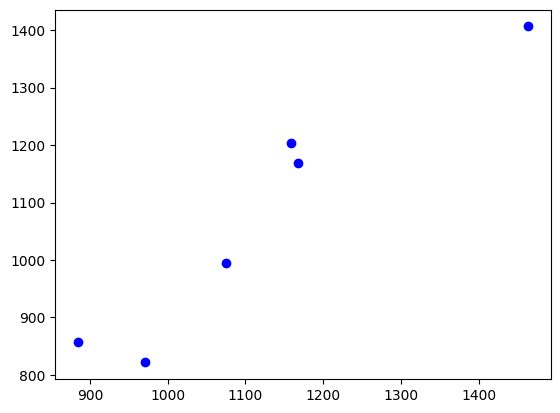

In [61]:
plt.scatter(y_test,y_pred,color="blue",label="Actual")
plt.show()

In [62]:
residuals=y_test-y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

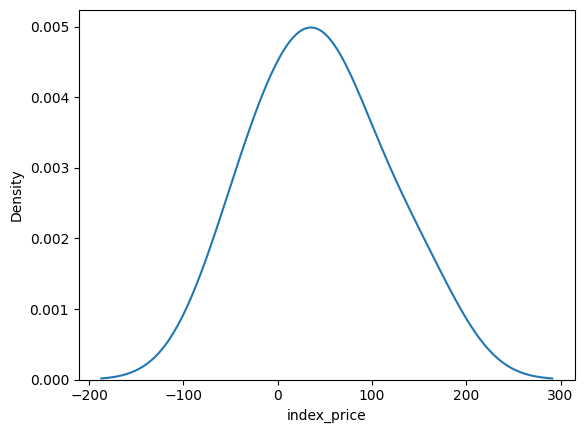

In [63]:
sns.kdeplot(residuals)
plt.show()